<h1>Trabalho final de IA</h1>

In [45]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<h3>Carregando a base de dados</h3>

In [46]:
df = pd.read_csv("17x_y.csv")
df.shape

(315, 19)

<h3>Conhecendo a base de dados</h3>

In [47]:
df.head(5)

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,meanDesg,maxDesg
0,0.932973,3.744,0.842471,1.752878,10.724,1.635964,1.329826,4.560,1.127491,0.076914,3.132293,0.077509,3.125459,0.078697,3.132950,-0.000060,0.002230,39.643519,48.892617
1,2.129609,8.427,1.864981,3.342663,14.302,3.149955,1.970562,7.410,1.683555,0.085411,3.275172,0.085716,3.235982,0.087895,3.277357,0.038556,0.012941,41.735507,49.570815
2,3.208514,11.534,2.672095,5.357855,20.826,4.816030,3.255444,11.815,2.689691,0.095767,3.262720,0.094333,3.194543,0.098742,3.243210,0.066571,0.019153,43.703867,50.302867
3,3.658698,11.788,2.992561,6.165583,24.148,5.532475,3.720401,12.852,3.121342,0.099040,3.191981,0.097245,3.143043,0.102259,3.131365,0.080003,0.022860,45.597525,51.083652
4,4.110436,12.555,2.979764,6.209699,24.337,5.747392,3.489672,11.704,3.294659,0.085091,3.303040,0.084096,3.253101,0.092056,3.169435,0.089196,0.024688,47.443761,52.250329


In [48]:
df.describe()

,rmsFX,maxFX,stdFX,rmsFY,maxFY,stdFY,rmsFZ,maxFZ,stdFZ,rmsVX,kVX,rmsVY,kVY,rmsVZ,kVZ,meanEA,stdEA,meanDesg,maxDesg
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,25.198841,57.466302,17.982983,12.065623,50.056917,10.631080,17.477373,45.973737,16.152791,0.124853,3.397319,0.118562,3.141274,0.139238,3.335515,0.122449,0.033409,108.438126,113.905093
std,23.526922,45.273645,15.211921,4.415624,14.659606,4.146123,9.434325,21.013097,8.907684,0.041693,0.180502,0.039223,0.086938,0.039919,0.257751,0.024092,0.006341,27.349577,27.820190
min,0.932973,3.744000,0.842471,1.752878,10.724000,1.635964,1.329826,4.560000,1.127491,0.076914,3.058372,0.075509,3.005821,0.078697,2.972836,-0.000060,0.002230,39.643519,48.892617
25%,7.561364,18.195000,4.315302,8.544589,39.251000,7.277455,9.286571,28.261000,8.283049,0.090669,3.230989,0.085730,3.077727,0.105342,3.090676,0.112072,0.030212,91.888397,94.568624
50%,14.824693,36.399000,11.676704,10.460452,45.908000,8.701248,15.127177,39.874000,14.124411,0.104186,3.385965,0.097411,3.125459,0.122209,3.320772,0.119162,0.033016,102.097093,104.681915
75%,42.360415,100.990000,30.267008,15.774086,62.225000,14.176330,26.376962,67.602000,24.520718,0.167027,3.551259,0.152891,3.186233,0.179075,3.559731,0.123670,0.035234,129.367996,133.496947
max,107.121324,178.400000,51.393480,24.159673,106.630000,22.878028,34.126591,79.475000,31.899990,0.218340,3.757530,0.202944,3.567035,0.228961,4.123833,0.247884,0.084318,165.172406,172.686837


In [49]:
# Checa os tipos de valores da base de dados
df.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 19 columns):
rmsFX       315 non-null float64
maxFX       315 non-null float64
stdFX       315 non-null float64
rmsFY       315 non-null float64
maxFY       315 non-null float64
stdFY       315 non-null float64
rmsFZ       315 non-null float64
maxFZ       315 non-null float64
stdFZ       315 non-null float64
rmsVX       315 non-null float64
kVX         315 non-null float64
rmsVY       315 non-null float64
kVY         315 non-null float64
rmsVZ       315 non-null float64
kVZ         315 non-null float64
meanEA      315 non-null float64
stdEA       315 non-null float64
meanDesg    315 non-null float64
maxDesg     315 non-null float64
dtypes: float64(19)
memory usage: 46.8 KB


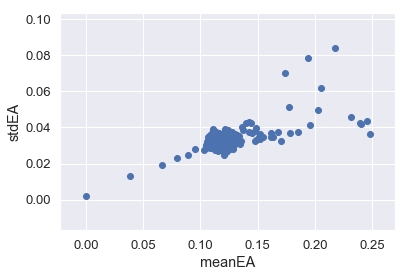

In [50]:
plt.scatter(df.meanEA, df.stdEA)
plt.xlabel('meanEA')
plt.ylabel('stdEA')
plt.show()

<h3>Seleção de características com árvore de decisão</h3>

<h4>Random Forest Regressor</h4>

In [51]:
# Isola as 17 características
X = df.iloc[:,0:17]

# Escolhe o desgaste máximo
Y = df.iloc[:,-1]

# Seleciona o nome das 17 características
names = df.columns.values
names = names[:17]

# Constrói o modelo de regressão com 100 árvores na floresta
regressor = RandomForestRegressor(n_estimators = 100)

bestRMSE = float("inf")
bestScore = 0.0
for i in range(50):
    # Divide o dataframe em conjunto de treinamento e conjunto de teste, com 33% das amostras para o conjunto de teste
    XTrain, XTest, YTrain, YTrue = train_test_split(X, Y, test_size = 0.33)
    for j in range(10):
        # Ajusta o modelo de regressão
        regressor.fit(X, Y)
        YPred = regressor.predict(XTest)
        # Calcula a Root Mean Squared Error, que representa o erro associado (quanto menor, melhor)
        currentRMSE = metrics.mean_squared_error(YTrue, YPred)
        currentScore = regressor.score(XTest, YTrue)
        #if currentRMSE < bestRMSE:
        if currentScore > bestScore:
            #bestRMSE = currentRMSE
            bestScore = currentScore
            bestRegressor = regressor
            bestYTrue = YTrue
            bestYPred = YPred
            _XTrain = XTrain
            _XTest = XTest
            _YTrain = YTrain

<h4>Erro associado à predição</h4>

In [52]:
bestRMSE

inf

<h4>Coeficiente de determinação R^2 da predição.</h4>
O melhor valor possível é 1.0.

In [53]:
bestScore

0.9999416412361516

In [54]:
result = []
for i in range(len(bestYTrue)):
    result.append([bestYTrue.iloc[i], bestYPred[i]])
result

[[94.56862356, 94.56862355999996],
 [124.9023469, 124.94779977200018],
 [96.59529149, 96.80858156790008],
 [170.5470173, 170.75310066499983],
 [140.0973471, 140.07784821699985],
 [110.8620528, 110.66869176099998],
 [97.35528535, 96.83660432969992],
 [100.9248194, 101.01707116769995],
 [135.0201002, 134.972375181],
 [131.2554931, 130.609070079],
 [89.80588243, 89.87577050209995],
 [97.82822082, 97.71890564909994],
 [160.9898432, 161.4184993190003],
 [117.0423215, 117.07646747899989],
 [94.56862356, 94.56862355999996],
 [108.4480774, 108.39086137700016],
 [93.99415074, 94.45980515499997],
 [154.3337295, 154.27539695200005],
 [95.48569329, 95.79911291280007],
 [165.0341403, 164.91658228600008],
 [122.6342497, 122.68125146200009],
 [128.1710319, 128.2621729339999],
 [116.5813874, 116.91010026699983],
 [147.0716935, 147.36015813900008],
 [94.56862356, 94.56837131819995],
 [136.2650196, 136.08535585200002],
 [117.4996682, 117.73966058000002],
 [106.5424124, 106.30617485930011],
 [99.64896132

<h4>Exibição dos resultados</h4>

In [55]:
print("Características ordenadas pela pontuação:")
print(sorted(zip(map(lambda x: round(x, 17), bestRegressor.feature_importances_), names), reverse = True))

Características ordenadas pela pontuação:
[(0.15731356312114453, 'rmsFX'), (0.15266953141073614, 'stdFZ'), (0.14456432819087728, 'stdFY'), (0.13592041609987038, 'rmsFZ'), (0.11902497160335326, 'stdFX'), (0.07356730829660318, 'maxFZ'), (0.07304628358860556, 'rmsFY'), (0.05893287597168426, 'maxFX'), (0.04496021973232962, 'rmsVY'), (0.0195086488003516, 'rmsVX'), (0.01004417129857365, 'rmsVZ'), (0.00723306040774848, 'meanEA'), (0.00131659661556793, 'maxFY'), (0.00101569270504278, 'stdEA'), (0.00054351017081817, 'kVY'), (0.00024945577087634, 'kVZ'), (8.936621581687e-05, 'kVX')]


<h4>Visualização da importância das 17 características</h4>

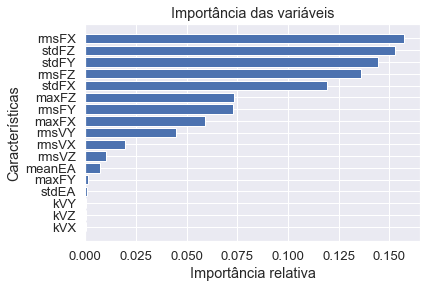

In [56]:
# Isola as importâncias das características (quanto maior, mais importante)
importance = bestRegressor.feature_importances_

# Ordena as importânticas das características 
sorted_importances = np.argsort(importance)

# Plota os dados
plt.barh(names, importance[sorted_importances], align = 'center')

# Customiza a plotagem
plt.yticks(names, names[sorted_importances])
plt.xlabel("Importância relativa")
plt.ylabel("Características")
plt.title("Importância das variáveis")

# Exibe a plotagem
plt.show()

<h4>Correlação de características</h4>

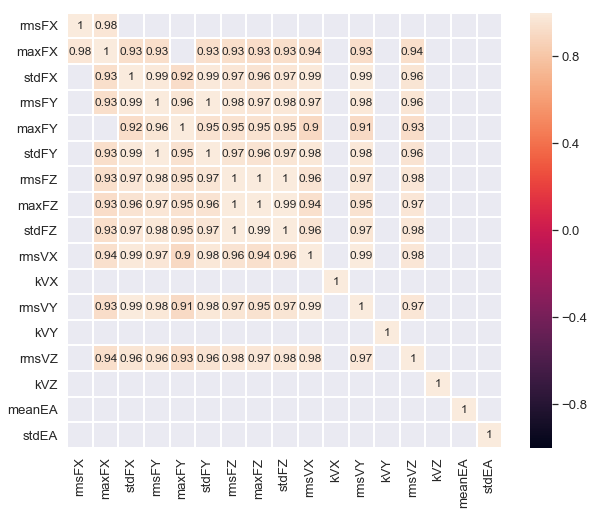

In [57]:
# Gerando a correlação das características
corr = df.drop(['meanDesg', 'maxDesg'], axis = 1).corr()

sns.set(font_scale = 1.2)
plt.figure(figsize = (10, 8))

# Exibindo as correlações maiores que 0.9 e menores que -0.9
ax = sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], vmax = 1.0, vmin = -1.0, linewidths = 1, annot = True, annot_kws = {"size": 12}, square = True);